# Пример уменьшения размерности

Рассмотрим основные моменты уменьшения размерности на примере из лекции (рукописные цифры). 

Подключим требуемые библиотеки.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Импортируем датасет.

In [22]:
X = datasets.load_digits().data #Объекты
y = datasets.load_digits().target #Отклики

In [46]:
X = np.genfromtxt("34_16.csv", delimiter=',')

Посмотрим, что из себя представляет, например, нулевой объект датасета.

In [47]:
X[0]

array([  9.95791902,  -0.3133717 ,   1.54531603,  -7.47261852,
        23.92733104, -23.04916641,  23.17531098, -15.18808887,
        -3.68389742, -14.4950804 ])

Уменьшим размерность при помощи библиотеки __sklearn__. Отдельно обращаем ваше внимание на параметр __svd_solver__, он отвечает за метод оптимизации. Дело в том, что в Python оптимизационные задачи решаются численно. При этом могут использоваться различные алгоритмы, а значит результаты могут несколько отличаться. Поэтому, чтобы получать одинаковые результаты, нужно использовать параметры модели, указанные в задании.

In [48]:
pca = PCA(n_components=2, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed = pca.fit(X).transform(X) #X_transformed -- ndarray объектов, где каждый объект описывается двумя ГК
X_transformed[0]

array([-35.16936068,  33.80524677])

Изобразим первые 100 объектов в виде точек на плоскости. В силу того, что нам известны отклики, отметим одинаковые цифры одинаковым цветом.

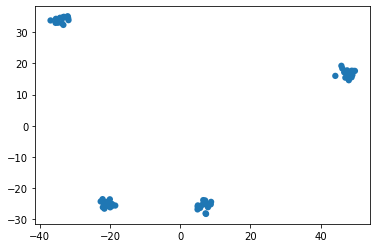

In [49]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], edgecolor='none', s=40,cmap='winter')

Если представить, что отклики нам неизвестны, то картина становится гораздо менее радужной. Объединение объектов в группы интуитивно, конечно, возможно, но с существенными оговорками.

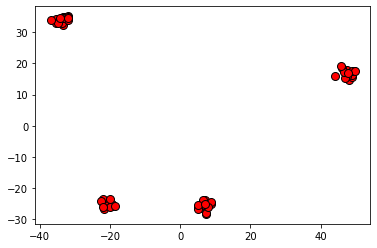

In [50]:
plt.plot(X_transformed[:, 0], X_transformed[:, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

Для дальнейшего анализа нам удобно будет построить не 2, а все 64 ГК (хотя, конечно, это можно было сделать и сразу, а картинку строить лишь по первым двум).

In [51]:
pca = PCA(n_components=10, svd_solver='full')
X_full = pca.fit(X).transform(X)

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.

In [52]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.516, 0.88 , 0.992, 0.994, 0.995, 0.997, 0.998, 0.999, 0.999,
       1.   ])

Построим график зависимости доли объясненной дисперсии от количества используемых ГК. Подробный описание произведено в лекции.

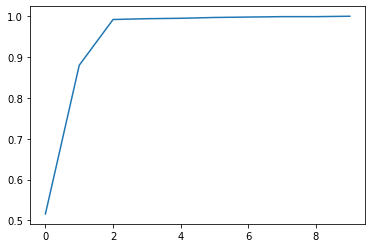

In [53]:
plt.plot(np.arange(10), explained_variance, ls = '-')